<a href="https://colab.research.google.com/github/dev-SB/twitter-sentiment-analysis/blob/master/Twitter_Sentiment_Analysis_Galaxy_S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!pip install pandas
!pip install tweepy
!pip install vaderSentiment
!pip install wordcloud

    100% |████████████████████████████████| 133kB 3.8MB/s 


In [0]:
import pandas as pd
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [0]:
consumer_key = 'RtF3OQ8uxal8szsrvMLprkMLS'
consumer_secret = 'IhAYrjmh3TW75MIrhlH1GpYsjEh2yM2EXNhg3EgbhZexw6y6R2'
access_token = '1013229198-vCviIxNhUeGsVlm3F1eDlHOCrYcWawKBrFaDODR'
access_token_secret = 'kUqy8DlOBKpqxAlAUqxWYMSLERnfBnQCLMgFSC2LpB7dF'

In [0]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)


In [0]:
api=tweepy.API(auth)


In [0]:
tweets=api.search(q='galaxy s10',lang='en',count=100)


In [10]:
data=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])
data.describe()

,Tweet
count,100
unique,71
top,RT @UniverseIce: It seems that the Galaxy S10+...
freq,23


In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
sid=SentimentIntensityAnalyzer()
list_t=[]
text=''
for index, row in data.iterrows():
    ss=sid.polarity_scores(row['Tweet'])
    text+=row['Tweet']
    list_t.append(ss)

In [0]:
data['Negative']=pd.Series([i['neg'] for i in list_t]).values
data['Neutral']=pd.Series([i['neu'] for i in list_t]).values
data['Positive']=pd.Series([i['pos'] for i in list_t]).values
data['Compound']=pd.Series([i['compound'] for i in list_t]).values

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
pr_text=''
for t in text:
  if not t in stop_words:
    pr_text+=t

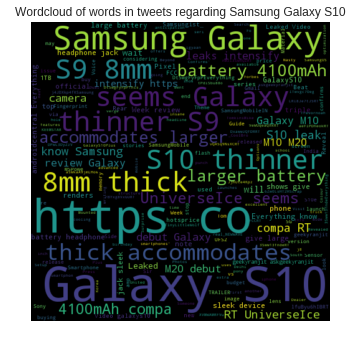

In [16]:
wordcloud=WordCloud(width=480,height=480, margin=0).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Wordcloud of words in tweets regarding Samsung Galaxy S10')
plt.show()


In [0]:
no_of_tweets=[0]*3
tweet_score=[0]*3
for index,row in data.iterrows():
  val= row['Compound']
  tweet_score[0]+=row['Positive']
  tweet_score[1]+=row['Negative']
  tweet_score[2]+=row['Neutral']
  if val>0:
    no_of_tweets[0]+=1
  elif val==0:
    no_of_tweets[1]+=1
  else:
    no_of_tweets[2]+=1  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f40102f32b0>],
      dtype=object)

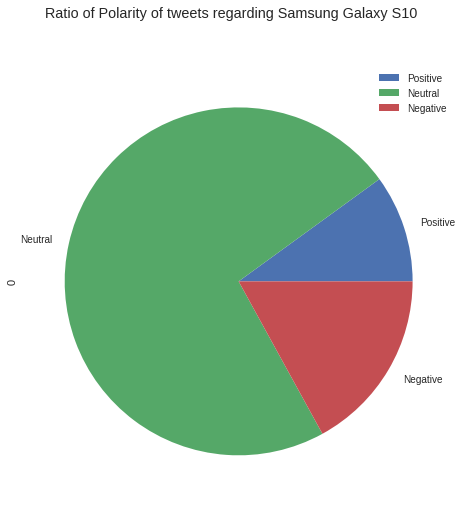

In [18]:
pie_df=pd.DataFrame(no_of_tweets,index=['Positive','Neutral','Negative'])
pie_df.plot(kind='pie',
            subplots=True,
            figsize=(8,8),
            title='Ratio of Polarity of tweets regarding Samsung Galaxy S10')

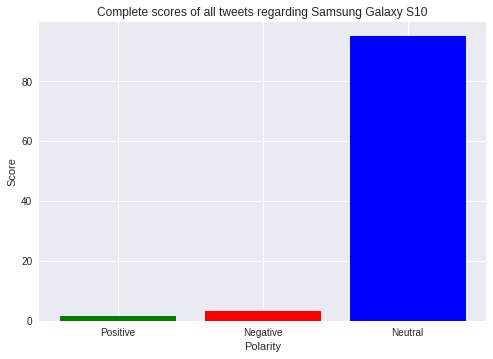

In [19]:
y_pos=np.arange(3)
plt.bar(y_pos,tweet_score,color=['green','red','blue'])
plt.xticks(y_pos,['Positive','Negative','Neutral'])
plt.xlabel('Polarity')
plt.ylabel('Score')
plt.title('Complete scores of all tweets regarding Samsung Galaxy S10')
plt.show()